In [124]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap

In [125]:
taem_phase_color_map_val = [0, 1, 2, 3]
taem_phase_color_map = ListedColormap(['red', 'blue', 'green', 'orange'])


a_l_phase_color_map = ListedColormap(['black', 'cyan', 'green', 'blue', 'orange', 'red'])

In [126]:
data = pd.read_csv('taem_dump.csv')

data['time'] = data['dtg'].cumsum()

data.head()

data.dtypes

,dtg,wow,h,hdot,x,y,surfv,surfv_h,xdot,ydot,...,smnz2,gralpr,alpcmd,hdmax,igra,dsbc_at1,istp4,dummy,Unnamed: 136,time
0,0.18,False,99879.984071,-170.815943,133209.857359,130248.113906,2485.226751,2479.349495,-2009.795544,-1451.859425,...,0.258,0,0,0,0,0,1,0,NaN,0.18
1,0.16,False,99852.706310,-170.140561,132891.587705,130014.890226,2482.833631,2476.997180,-2005.877559,-1453.261934,...,0.258,0,0,0,0,0,1,0,NaN,0.34
2,0.16,False,99825.548406,-169.442255,132573.944263,129781.450236,2480.432985,2474.638785,-2001.995454,-1454.596617,...,0.258,0,0,0,0,0,1,0,NaN,0.50
3,0.16,False,99798.513987,-168.851324,132256.925727,129547.800235,2478.054091,2472.294745,-1998.145973,-1455.903149,...,0.258,0,0,0,0,0,1,0,NaN,0.66
4,0.18,False,99768.225075,-168.362250,131901.006641,129284.700873,2475.490044,2469.758108,-1993.985423,-1457.301356,...,0.258,0,0,0,0,0,1,0,NaN,0.84


dtg              float64
wow                 bool
h                float64
hdot             float64
x                float64
y                float64
surfv            float64
surfv_h          float64
xdot             float64
ydot             float64
psd              float64
mach             float64
qbar             float64
cosphi           float64
costh            float64
weight           float64
gamma            float64
alpha            float64
nz               float64
ovhd                bool
rwid              object
grtls               bool
cubic_c3         float64
cubic_c4         float64
pbhc_0             int64
pbhc_1           float64
pbrc_0             int64
pbrc_1           float64
alpul            float64
alpll            float64
delrng             int64
dnzc             float64
dnzcl            float64
dnzll              int64
dnzul              int64
dpsac            float64
drpred           float64
dsbc_at          float64
dsbi               int64
eas_cmd          float64


In [127]:
def vert_sit_disp(n, data):
        
    if (n==1):
        r_eow = [90000, 300000]
    elif (n==2):
        r_eow = [0, 120000]
        
    traj_data = data[(data['eow'].between(*r_eow))][['rpred', 'eow', 'en', 'es', 'emep', 'iphase']]
    
    traj_rpred = traj_data['rpred'].to_numpy() * 0.3048
    traj_eow = traj_data['eow'].to_numpy() * 0.3048
    traj_en = traj_data['en'].to_numpy() * 0.3048
    traj_es = traj_data['es'].to_numpy() * 0.3048
    traj_emep = traj_data['emep'].to_numpy() * 0.3048
    

    
    
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax
    
    img = plt.imread("vsit" + str(n) + "_bg.png")
    #plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])
    
    plt_.scatter(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_eow), 
            s=0.5, c=traj_data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3
    )
    plt_.plot(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_en)
    )
    plt_.plot(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_es)
    )
    plt_.plot(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_emep)
    )
    
    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])




def vert_sit_x_convert_new(n, rpred):
    out = 0
    if (n == 1):
        out = (rpred / 58000 -  0.84235294117)
    elif (n == 2):
        out = (rpred / 49720)
    return out * 380
    
def vert_sit_y_convert_new(n, eow):
    out = 0
    if (n == 1):
        out = (eow / 45000  - 0.44857142857)
    elif (n == 2):
        out = (eow / 36000 + 0.03)
    return 50 + 300 * out

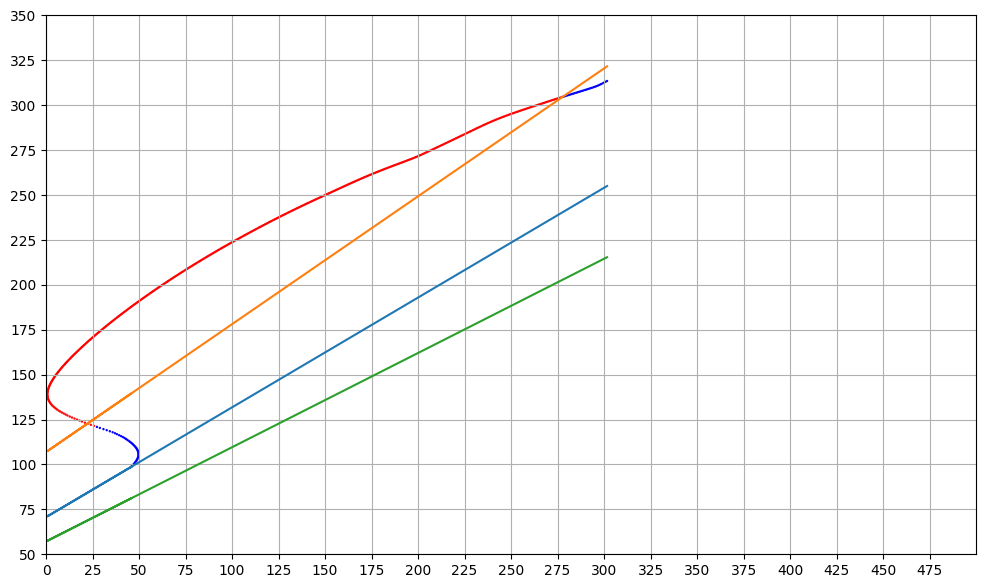

In [128]:
vert_sit_disp(1, data)

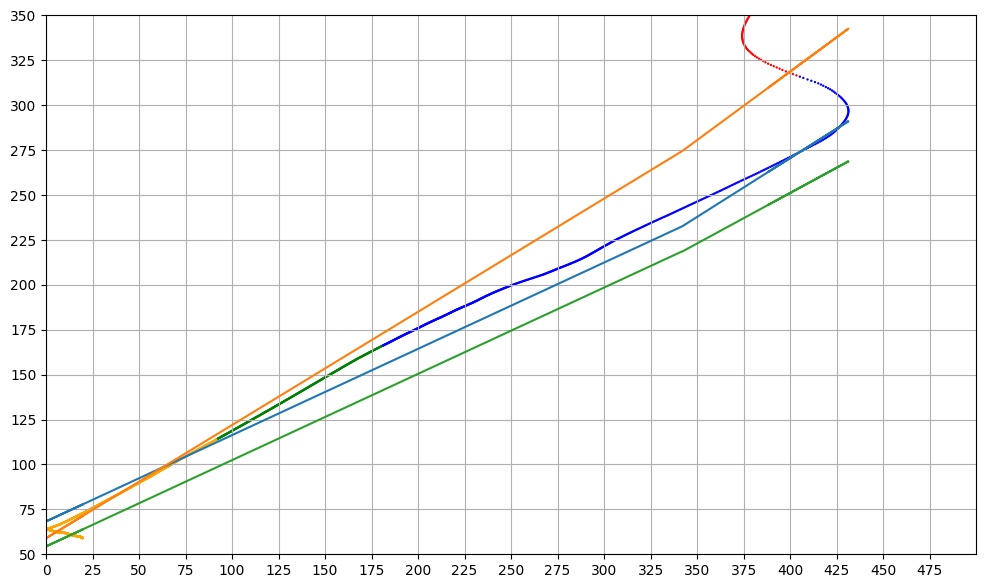

In [129]:
vert_sit_disp(2, data)